<a href="https://colab.research.google.com/github/ChaaruVijay/DSPL-CourseWork/blob/main/Finalized_Traincsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Train CSV**

**Data Exploration**

In [1]:
#importing necessary libraries
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the csv
train = pd.read_csv("/content/traincsv.csv")
train

<ipython-input-2-658cef5547d6>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/traincsv.csv")


Customer_ID outlet_city luxury_sales fresh_sales dry_sales  \
0          10493832    Kelaniya       1209.6       756.0    5292.0   
1          10178643    Moratuwa      1590.12     1060.08   6007.12   
2          10513916     Wattala      2288.88     1481.04   9155.52   
3          10334589     Wattala      2274.94     1739.66   9099.76   
4          10458365    Kelaniya      2345.49     2069.55   9243.99   
...             ...         ...          ...         ...       ...   
185477     10283442    Moratuwa       715.77     4294.62    1301.4   
185478     10735059  Peliyagoda      1215.89     6453.57   1683.54   
185479     10096675    Homagama       989.56     6027.32   1619.28   
185480     10405424  Peliyagoda      1224.34     6310.06   1601.06   
185481     10513473    Kaduwela       2247.3         100       NaN   

       cluster_catgeory  
0                     4  
1                     1  
2                     4  
3                     4  
4                     4  
...                 ...  
185477              2.0  
185478              2.0  
185479              2.0  
185480              2.0  
185481              NaN  

[185482 rows x 6 columns]

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185482 entries, 0 to 185481
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Customer_ID       185482 non-null  int64 
 1   outlet_city       185482 non-null  object
 2   luxury_sales      185475 non-null  object
 3   fresh_sales       185472 non-null  object
 4   dry_sales         185479 non-null  object
 5   cluster_catgeory  185481 non-null  object
dtypes: int64(1), object(5)
memory usage: 8.5+ MB


In [4]:
train.describe(include='all')

Customer_ID   outlet_city luxury_sales  fresh_sales  dry_sales  \
count   1.854820e+05        185482       185475     185472.0   185479.0   
unique           NaN            10        53663      80607.0    89147.0   
top              NaN  Nuwara Eliya       1231.2       1018.8     5085.3   
freq             NaN         18878           25         19.0       17.0   
mean    1.038734e+07           NaN          NaN          NaN        NaN   
std     2.235416e+05           NaN          NaN          NaN        NaN   
min     1.000000e+07           NaN          NaN          NaN        NaN   
25%     1.019394e+07           NaN          NaN          NaN        NaN   
50%     1.038694e+07           NaN          NaN          NaN        NaN   
75%     1.058117e+07           NaN          NaN          NaN        NaN   
max     1.077415e+07           NaN          NaN          NaN        NaN   

       cluster_catgeory  
count            185481  
unique               16  
top                   4  
freq             131039  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN

In [5]:
train.shape

(185482, 6)

In [6]:
unique_inputs_train = train.apply(pd.Series.unique)
print(unique_inputs_train)

Customer_ID         [10493832, 10178643, 10513916, 10334589, 10458...
outlet_city         [Kelaniya, Moratuwa, Wattala, Homagama, Dehiwa...
luxury_sales        [1209.6, 1590.12, 2288.88, 2274.94, 2345.49, 1...
fresh_sales         [756.0, 1060.08, 1481.04, 1739.66, 2069.55, 91...
dry_sales           [5292.0, 6007.12, 9155.52, 9099.76, 9243.99, 5...
cluster_catgeory    [4, 1, 99, 2, 5, 3, 6, 6\, 4.0, 2.0, 1.0, 95.0...
dtype: object


In [7]:
train.duplicated().sum()

np.int64(0)

In [8]:
train.isnull().sum()

Customer_ID          0
outlet_city          0
luxury_sales         7
fresh_sales         10
dry_sales            3
cluster_catgeory     1
dtype: int64

In [9]:
#convert the strings to numeric value
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce').astype(float)
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce').astype(float)
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce').astype(float)

UNIVARIATE ANALYSIS

Histograms

In [10]:
#histogram of fresh sales
fig = px.histogram(train, x='fresh_sales', nbins=30, title=f"Distribution of 'fresh_sales'")
fig.show()

In [11]:
#histogram of luxury sales
fig = px.histogram(train, x='luxury_sales', nbins=30, title=f"Distribution of 'Luxury Sales'")
fig.show()

In [12]:
#histogram of dry sales
fig = px.histogram(train, x='dry_sales', nbins=30, title=f"Distribution of 'Dry Sales'")
fig.show()

Box Plots

In [13]:
#Box plots of dry sales
fig1 = px.box(train, y="dry_sales", title="Box Plot of Dry Sales")
fig1.show()

In [14]:
#Box plots of luxury sales
fig2 = px.box(train, y="luxury_sales", title="Box Plot of Luxury Sales")
fig2.show()

In [15]:
#Box plots of fresh sales
fig3 = px.box(train, y="fresh_sales", title="Box Plot of Fresh Sales")
fig3.show()

MULTIVARIATE ANALYSIS

In [16]:
#Correlation Analysis
corr_matrix = train[['luxury_sales', 'fresh_sales', 'dry_sales']].corr()
fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale=px.colors.sequential.Viridis,
                title="Correlation Heatmap")
fig.show()

In [17]:
#Sales by City
city_sales = train.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].sum().reset_index()
fig = px.bar(city_sales, x='outlet_city', y=['luxury_sales', 'fresh_sales', 'dry_sales'],
             title="Sales by City", barmode='group')
fig.show()

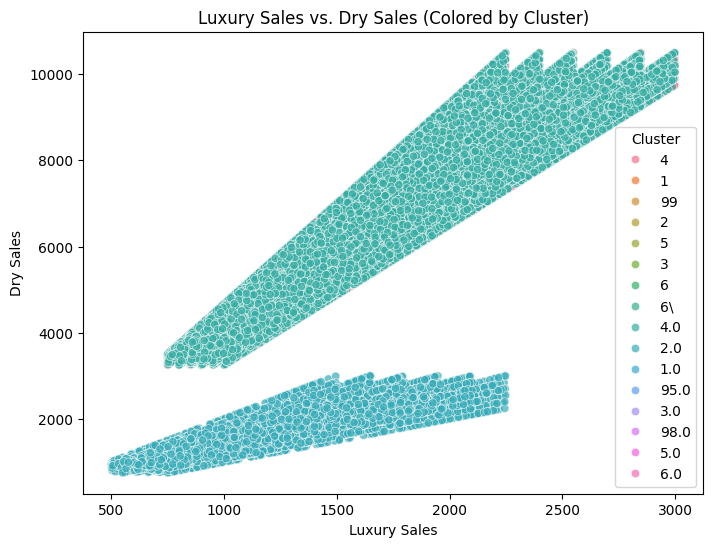

In [19]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x="luxury_sales", y="dry_sales", hue="cluster_catgeory", alpha=0.7)
plt.legend(title="Cluster")
plt.title("Luxury Sales vs. Dry Sales (Colored by Cluster)")
plt.xlabel("Luxury Sales")
plt.ylabel("Dry Sales")
plt.legend(title="Cluster")
plt.show()